### KNN 회귀(Regression)

#### 생선의 길이를 사용하여 무게를 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

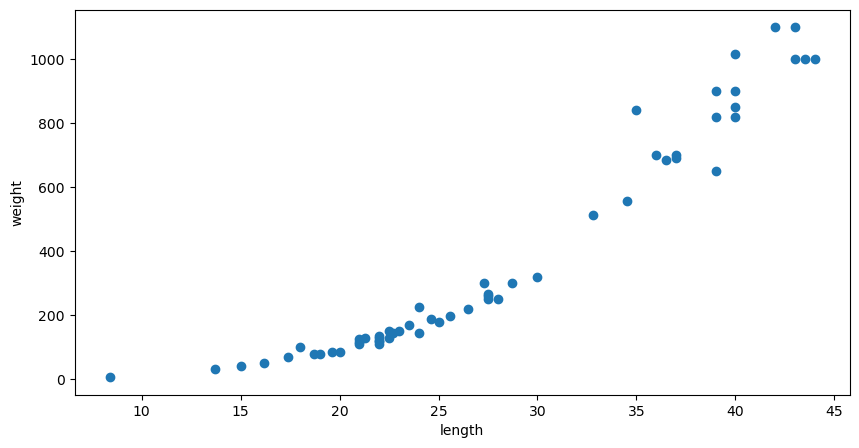

In [3]:
plt.figure(figsize=(10,5))

plt.scatter(
    x=fish_length,
    y=fish_weight
)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length,
    fish_weight,
    # test_size=0.2,
    random_state=42
)

In [6]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [7]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [8]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [9]:
train_input[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [10]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀모델 사용

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor( n_neighbors=5)
knr = knr.fit(train_input, train_target)
knr

KNeighborsRegressor()

In [13]:
knr.score(test_input, test_target)
# ?????

0.992809406101064

> 회귀모델은 분류모델처럼 예측갑소가 정답값을 비교할 수 없음..

## 결정계수($R^2$) : 평균 절대값 오차

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
# 테스트 세트에 대한 예측을 만든다.

test_pred = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대오차를 계산 : 표준 오차
mae = mean_absolute_error(test_target, test_pred)
mae

19.157142857142862

### 과대적합(Overfitting)과 과소적합(Underfitting)

In [16]:
knr.score(train_input, train_target)

0.9698823289099254

In [17]:
knr.score(test_input, test_target)

0.992809406101064

### knn의 HyperParameter를 조절

In [18]:
# 이웃의 default = 5, 3으로 조절하자!

In [19]:
knr = KNeighborsRegressor( n_neighbors=3)
knr = knr.fit(train_input, train_target)
knr

KNeighborsRegressor(n_neighbors=3)

In [20]:
print('Train Score :', knr.score(train_input, train_target))
print( 'Test Score :' ,knr.score(test_input, test_target))

Train Score : 0.9804899950518966
Test Score : 0.9746459963987609


### 이웃의 갯수 조절로 확인


K => 1
Train Score : 0.9852830341215901
Test Score :  0.991309195814175


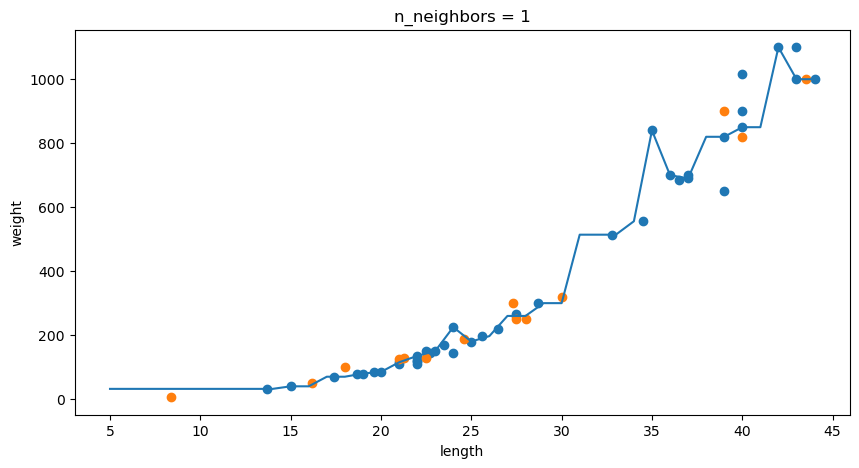

K => 3
Train Score : 0.9804899950518966
Test Score :  0.9746459963987609


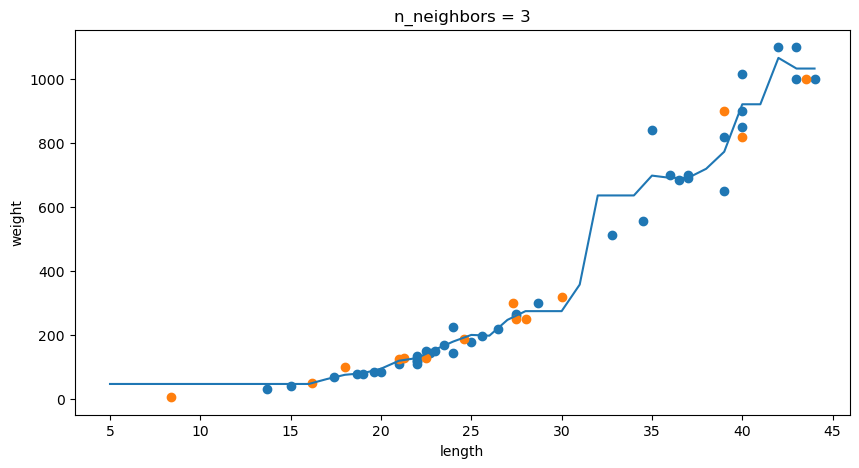

K => 5
Train Score : 0.9698823289099254
Test Score :  0.992809406101064


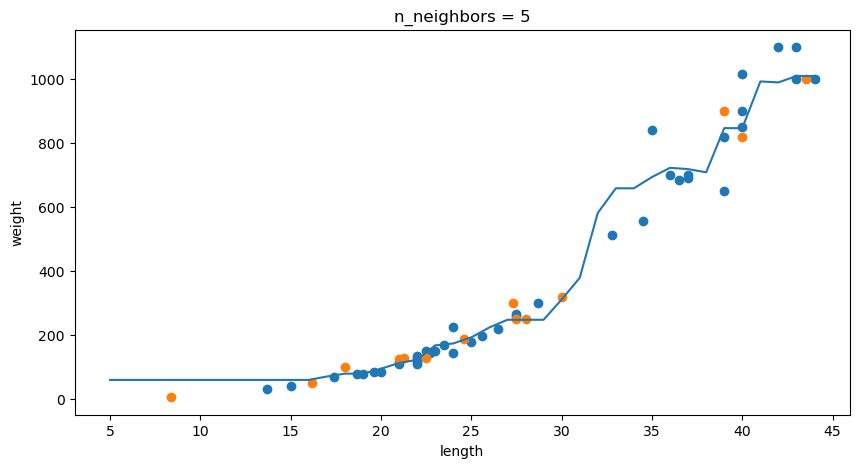

K => 10
Train Score : 0.96164569026043
Test Score :  0.9737908255822255


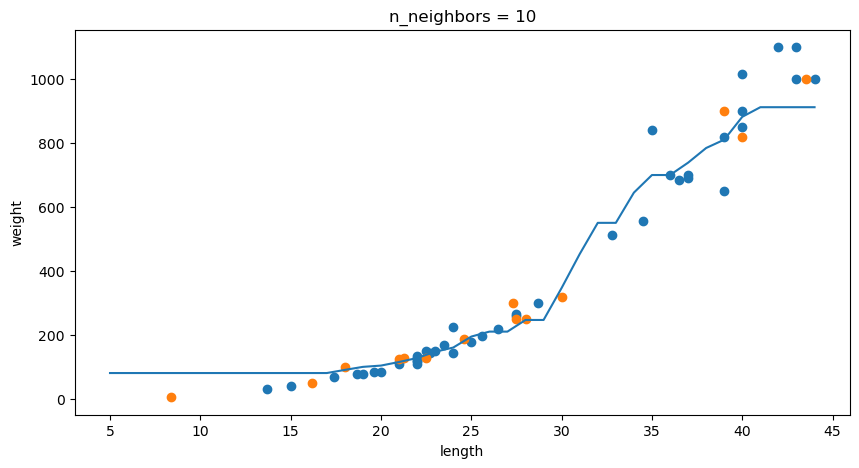

In [21]:
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표 만들기

x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 3, 5, 10일때 예측 결과를 그래프로 그리기
for n in [1, 3, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print("K =>", n)
    print("Train Score :", knr.score(train_input, train_target))
    print("Test Score : ", knr.score(test_input, test_target))

    # 지정한 범위 x 에 대한 예측 구하기
    prediction = knr.predict(x)


    # 훈련세트와 검증세트의 예측 결과 그래프
    plt.figure(figsize=(10,5))
    plt.scatter(train_input,train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)

    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()


### 이웃의 갯수가 3인게 제일 좋은 것 같다..

In [22]:
knr = KNeighborsRegressor( n_neighbors=3)
knr = knr.fit(train_input, train_target)
print('Train Score :', knr.score(train_input, train_target))
print( 'Test Score :' ,knr.score(test_input, test_target))

Train Score : 0.9804899950518966
Test Score : 0.9746459963987609


### 길이가 50cm인 생선의 무게는?


In [23]:
knr.predict([[42]])

array([1066.66666667])

### 기존 데이터와 무게 확인

In [24]:
for i, v in zip(train_input,train_target):
    if v == train_target.max():
        print(i, v)

[43.] 1100.0
[42.] 1100.0


### 산점도로 이웃을 확인해보자

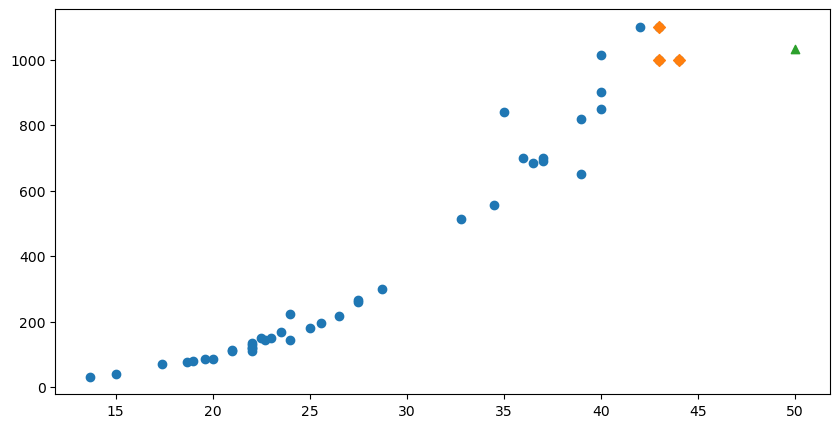

In [25]:
# 50cm의 이웃
distance, indexes = knr.kneighbors([[50]])

plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')


plt.scatter(50, 1033, marker = '^')

plt.show()




In [26]:
# 이웃의 평균값을 구해보자
np.mean(train_target[indexes])

1033.3333333333333

In [27]:
knr.predict([[100]])

array([1033.33333333])

> KNN Regression은 내 주변 이웃의 값들의 평균을 구하는 것이므로 학습한 데이터의 범위를 벗어나게 되면 사용할 수 없음.

---
### 선형회귀식(Linear Regression)
: 직선이나 곡선의 함수식(Y = aX + b)를 이용하여 구하는 방정식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [30]:
print(lr.predict([[50]]))

[1241.83860323]


In [31]:
# Y = aX + b (a : 기울기, b : 절편) -> Deep Learning Y^=wX + b(w: 가중치, b : 절편(bias)
print(lr.coef_)
print(lr.intercept_)


[39.01714496]
-709.0186449535474


### 산점도 그리기

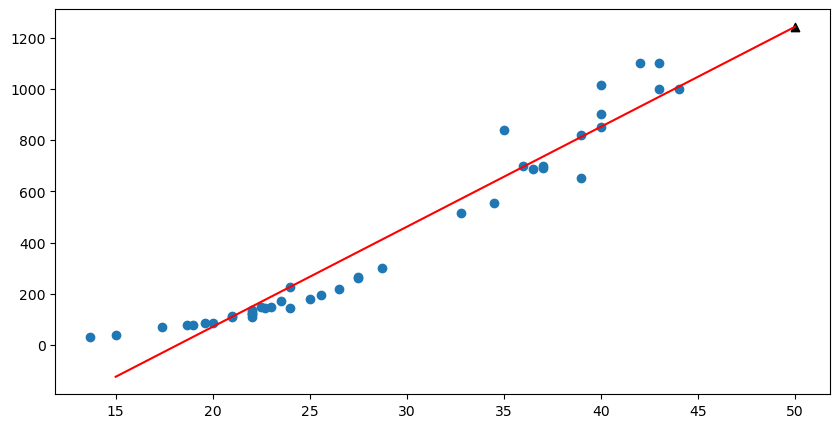

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(train_input, train_target)



plt.plot(
    [15, 50],
    [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_],
    c = 'red'
)

plt.scatter(50, 1241.8, marker='^', c='black')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다.  
절편이 음수이다.

### 과대적합과 과소적합 확인

In [34]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


> 과대적합..

---
### 다항회귀

Y = $aX^2$ +$bX$ + C
- 항이 여러개있고 Featrue가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀라고 한다.

In [38]:
# Feature를 제곱한 컬럼을 생성하여 기존의 컬럼에 붙인다.

train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [39]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [41]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [44]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [45]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


### 산점도 그리기

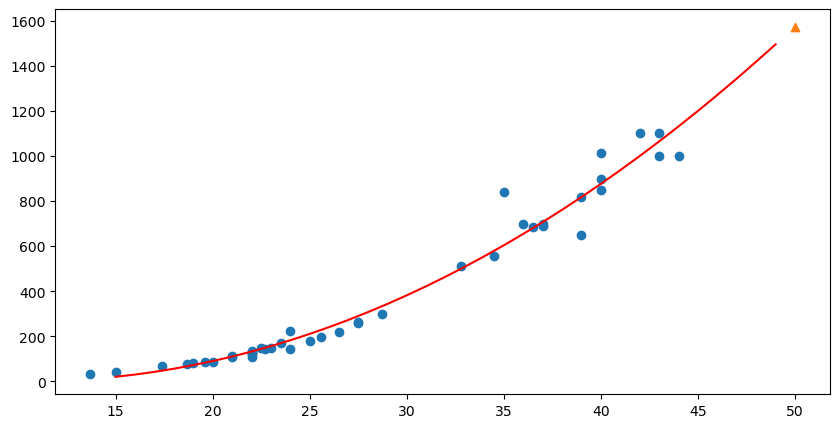

In [47]:
point = np.arange(15, 50)

plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)


plt.plot(
    point,
    (point ** 2) * lr.coef_[0] + point * lr.coef_[1]  +lr.intercept_,
    color = 'red'
)

plt.scatter(50, 1573, marker='^')

In [48]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
